# lab1_4

In [26]:
import math
import numpy as np
import sympy as sm
from sympy import Derivative, diff
from itertools import groupby
import matplotlib.pyplot as plt
from tabulate import tabulate
from pprint import pprint

from IPython.display import display, Latex, clear_output

In [11]:
sm.init_printing(use_latex='mathjax')
x, y = sm.symbols('x, y', real=True)
C1, C2 = sm.symbols("C1, C2", real=True)
u = sm.Function('u')
k = sm.Function('k')
q = sm.Function('q')
ux = u(x)
ux1 = Derivative(u(x), x)
ux2 = Derivative(u(x), (x, 2))

h, uup1, uum1, uu0 = sm.symbols('h, u_i+1, u_i-1, u_i', Function=True)
uux1 = (uup1 - uum1)/(2*h)
uux2 = (uup1 - 2*uu0 + uum1)/(h**2)

In [12]:
zad1 = {
    'a': 0,  'b': 2.3, 'c': 1.725,
    'k1': 0.5, 'q1': 3.5,
    'k2': 1.2, 'q2': 8.2,
    'f': 10*x*(2.5-x)
}

## тестовый пример

In [13]:
mainEq = sm.Eq(diff(zad1['k1']*ux1, x) + zad1['q1']*ux,  zad1['f'])
mainEq

                 2                       
                d                        
3.5⋅u(x) + 0.5⋅───(u(x)) = 10⋅x⋅(2.5 - x)
                 2                       
               dx                        

### апроксимированное уравнение

In [14]:
#apro = mainEq.subs({ux: uu0, ux2: uux2, ux1: uux1 })
apro = sm.Eq(k(x)*uux2 + q(x)*uu0,  zad1['f'])
display(apro)

          (-2⋅uᵢ + uᵢ₊₁ + uᵢ₋₁)⋅k(x)                 
uᵢ⋅q(x) + ────────────────────────── = 10⋅x⋅(2.5 - x)
                       2                             
                      h                              

### вычисление шага, переменных и массива абсцисс

In [15]:
count, n = 10, 10
n -= 1

hh = (zad1['b'] - zad1['a']) / n
us = sm.symbols(' '.join([f"u{i}" for i in range(count)]))
list_x = [zad1['a'] + hh*i for i in range(count)]
display(hh)
display(us)
display(list_x)

0.25555555555555554

(u₀, u₁, u₂, u₃, u₄, u₅, u₆, u₇, u₈, u₉)

[0.0, 0.25555555555555554, 0.5111111111111111, 0.7666666666666666, 1.022222222
2222221, 1.2777777777777777, 1.5333333333333332, 1.7888888888888888, 2.0444444
444444443, 2.3]

### система

In [16]:
tyts = []
def_k = lambda x: (zad1['k1'] if x <= zad1['c'] else zad1['k2'])
def_q = lambda x: (zad1['q1'] if x <= zad1['c'] else zad1['q2'])
#tyts.append(sm.Eq((-us[2]+4*us[1]-3*us[0])/(2*hh), zad1['UA']))
tyts.append(sm.Eq(-zad1['k1']*(us[1]-us[0])/(hh) + 0.5*us[0], 0))
tyts.extend([apro.subs({x: list_x[i], k(x): def_k(list_x[i]), q(x): def_q(list_x[i]), 
                        h: hh, uum1: us[i-1], uu0: us[i], uup1: us[i+1]})  for i in range(1,n)])
tyts.append(sm.Eq(zad1['k2']*(us[count-2]-us[count-1])/(hh) + 0.5*us[count-1], 0))
display(*map(lambda e: e.n(3), tyts))

2.46⋅u₀ - 1.96⋅u₁ = 0

7.66⋅u₀ - 11.8⋅u₁ + 7.66⋅u₂ = 5.74

7.66⋅u₁ - 11.8⋅u₂ + 7.66⋅u₃ = 10.2

7.66⋅u₂ - 11.8⋅u₃ + 7.66⋅u₄ = 13.3

7.66⋅u₃ - 11.8⋅u₄ + 7.66⋅u₅ = 15.1

7.66⋅u₄ - 11.8⋅u₅ + 7.66⋅u₆ = 15.6

7.66⋅u₅ - 11.8⋅u₆ + 7.66⋅u₇ = 14.8

18.4⋅u₆ - 28.5⋅u₇ + 18.4⋅u₈ = 12.7

18.4⋅u₇ - 28.5⋅u₈ + 18.4⋅u₉ = 9.31

4.7⋅u₈ - 4.2⋅u₉ = 0

In [17]:
def maper(expr):
    if (expr.func == sm.Mul or expr.func == sm.Symbol):
        return [expr]
    return list(expr.args)

def maper2(expr):
    if(isinstance(expr, int) or isinstance(expr, float)):
        return float(expr)
    if (expr.func == sm.Symbol):
        return 1.0
    elif (expr == 0):
        return 0.0
    return float(expr.args[0])

def maper3(express):
    for e in express:
        e.sort(key=comparator)
    for e in express:
        if (len(e) != n+1):
            for i, v in enumerate(e):
                if comparator(v) != i:
                    e.insert(i, 0)
            if (len(e) != n+1):
                e.extend([0]*(n+1-len(e)))

def comparator(expr):
    if (expr.args == () ):
        text = str(expr)
    else:
        text = str(expr.args[1])
    return int(text[1:])

express = list(map(lambda t: maper(t.lhs), tyts))
maper3(express)


#print(express)        

expr_values = list(map(lambda t: list(map(lambda t2: maper2(t2), t)), express))
f_values = list(map(lambda t: float(t.rhs), tyts))
print(tabulate(expr_values, floatfmt=".3"))
print(f_values)

----  ------  ------  ------  ------  ------  ------  ------  -----  ----
2.46   -1.96    0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.0
7.66  -11.8     7.66    0.0     0.0     0.0     0.0     0.0     0.0   0.0
0.0     7.66  -11.8     7.66    0.0     0.0     0.0     0.0     0.0   0.0
0.0     0.0     7.66  -11.8     7.66    0.0     0.0     0.0     0.0   0.0
0.0     0.0     0.0     7.66  -11.8     7.66    0.0     0.0     0.0   0.0
0.0     0.0     0.0     0.0     7.66  -11.8     7.66    0.0     0.0   0.0
0.0     0.0     0.0     0.0     0.0     7.66  -11.8     7.66    0.0   0.0
0.0     0.0     0.0     0.0     0.0     0.0    18.4   -28.5    18.4   0.0
0.0     0.0     0.0     0.0     0.0     0.0     0.0    18.4   -28.5  18.4
0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     4.7  -4.2
----  ------  ------  ------  ------  ------  ------  ------  -----  ----
[0.0, 5.735802469135802, 10.165432098765432, 13.288888888888888, 15.106172839506172, 15.617283950617283, 14.8222

In [22]:
def TDMA(a,b,c,f):
    a, b, c, f = map(lambda k_list: list(map(float, k_list)), (a, b, c, f))
    a[0] = 0
    n = len(f)
    c[n-1] = 0
    alpha = [0]*n
    beta = [0]*n
    x = [0]*n
    u = [0]*n
    
    x[0] = b[0]
    alpha[0] = -c[0]/x[0]
    beta[0] = f[0]/x[0]
    
    for i in range(1,n-1):
        x[i] = b[i] + a[i]*alpha[i-1]
        alpha[i] = -c[i]/x[i]
        beta[i] = (f[i] - a[i]*beta[i-1])/x[i]
    
    x[n-1] = b[n-1] + a[n-1]*alpha[n-2]
    beta[n-1] = (f[n-1] - a[n-1]*beta[n-2])/x[n-1]
    
    u[n-1] = beta[n-1]
    for i in range(n-2,-1,-1):
        u[i] = alpha[i]*u[i+1] + beta[i]
    

    return u

a = [0] + [expr_values[i+1][i] for i in range(n+1-1)]
b = [expr_values[i][i] for i in range(n+1)]
c = [expr_values[i][i+1] for i in range(n+1-1)] + [0]

print(tabulate({'a':a, 'b':b, 'c':c}, headers='keys', showindex="always", tablefmt="github" , floatfmt=".3f"))
#print(tabulate([a, b, c], headers=['a', 'b', 'c'], showindex="always"))
xxx = TDMA(*[a,b,c], f_values)
#display(*xxx)
result = sm.solve(tyts, us)
print()
print(tabulate({'U':result.keys(), 'TDMA':xxx, 'SymPy':result.values()}, headers='keys', tablefmt="github" , floatfmt="10.5f"))

IndexError: list index out of range

вычисление системы

## основная задача

In [19]:
def solve1(zad, n):
    count = n
    n -= 1
    ## апроксимированное уравнение
    apro = sm.Eq(k(x)*uux2 + q(x)*uu0,  zad['f'])
    ## определяем шаг
    hh = (zad['b'] - zad['a']) / n
    ## переменные u1-u*
    us = sm.symbols(' '.join([f"u{i}" for i in range(n+1)]))
    ## массив обсцисс
    list_x = [zad['a'] + hh*i for i in range(n+1)]
    
    ## система из n+1 уравнений
    tyts = []
    def_k = lambda x: (zad['k1'] if x <= zad['c'] else zad['k2'])
    def_q = lambda x: (zad['q1'] if x <= zad['c'] else zad['q2'])
    tyts.append(sm.Eq(-zad['k1']*(us[1]-us[0])/(hh) + 0.5*us[0], 0))
    tyts.extend([apro.subs({x: list_x[i], k(x): def_k(list_x[i]), q(x): def_q(list_x[i]), 
                            h: hh, uum1: us[i-1], uu0: us[i], uup1: us[i+1]})  for i in range(1,n)])
    tyts.append(sm.Eq(zad1['k1']*(us[count-2]-us[count-1])/(hh) + 0.5*us[count-1], 0))
    
    express = list(map(lambda t: maper(t.lhs), tyts))
    maper3(express)
    expr_values = list(map(lambda t: list(map(lambda t2: maper2(t2), t)), express))
    f_values = list(map(lambda t: float(t.rhs), tyts))
    
    a = [0] + [expr_values[i+1][i] for i in range(count-1)]
    b = [expr_values[i][i] for i in range(count)]
    c = [expr_values[i][i+1] for i in range(count-1)] + [0]
    xxx = TDMA(*[a,b,c], f_values)
    
    #result = sm.solve(tyts, us)
    return list_x, xxx #, list(result.values())

### find accuracy

шаг 0.057500


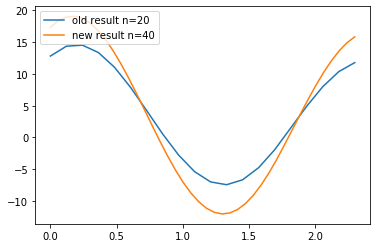

qwerty: q


In [20]:
#E = zad1['E']
#E_cur = 0
n = 5
result = solve1(zad1, n)
n *= 2
while(True):
    hh = (zad1['b'] - zad1['a']) / n
    plt.plot(*result, label=f"old result n={int(n/2)}")
    result = solve1(zad1, n)
    plt.plot(*result, label=f"new result n={n}" )
    plt.legend(loc='upper left')
    print("шаг %f" % hh)
    plt.show()   
    #display(*solve1(zad1, n))
    if(input("qwerty: ") == 'q'):
        break
    n *= 2
    clear_output()